# Introduction to notebooks


Notebooks are handy when exploring datasets and prototyping. 

You can comment along the way by changing the element type to markdown. Then you are free to make comments and write about the project. 

Seach for Markdown Cheatsheet or click [Here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) if you want nice examples of how to style your comments.

## Importing libraries


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import time as ti

from matplotlib import pyplot as plt

# List, dicts and tuples
List, tuples and dictionaries are commonly used classes when working with python.

## Lists

In [2]:
l = [1,2,'a']
print(l)

# Python starts to count from 0
print('First element: ' , l[0])

# Last element in a list can be reached as element -1
print('First element from end: ' , l[-1])

#The second element in a list can be replaced by
l[1] = 3

# List is an object with a lot of methods
print('Type of l:',type(l))
print('Methods available in the list class:',[ list_methods for list_methods in dir(l) if not list_methods.startswith('__')])

# We can add stuff to the end of the list with the append method 
l.append([0])
l.append(1)
print(l)
print('Counted 1 in l: %d'%(l.count(1)))
# We can loop over lists
for value in l:
    print(value)


# But lists might be tricky, sometimes the memory reference i passed to the function, sometimes a copy of the value
def f(a_list, a):
    a_list[0] = 7
    a = 4
    return 1
a = 3
print(a)
print(l)

f(l,a)
print('List is changed, integer is not:',l,a)

[1, 2, 'a']
First element:  1
First element from end:  a
Type of l: <class 'list'>
Methods available in the list class: ['append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']
[1, 3, 'a', [0], 1]
Counted 1 in l: 2
1
3
a
[0]
1
3
[1, 3, 'a', [0], 1]
List is changed, integer is not: [7, 3, 'a', [0], 1] 3


## Tuples

Tuples are immutable lists that lacks some of the methods of lists. Therefore they become a little more efficient

In [3]:
t = ('a','b',3)
print(type(t))
print('Methods available in the tuple class:',[ tuple_methods for tuple_methods in dir(t) if not tuple_methods.startswith('__')])
print(t.count('a'))
print('First element in tuple:',t[0])
print(t.index('a'))
try:
    t[0]=1
except:
    print('You are not allowed to change tuples')


<class 'tuple'>
Methods available in the tuple class: ['count', 'index']
1
First element in tuple: a
0
You are not allowed to change tuples


In [4]:
# Dicts or dictionarys is another common python class that allows the variable to be a little more structured
# Benefit is that an element can be accessed by a key
persons={'Erik':{'age':19,'sex':'m'},
        'Sven':{'age':25,'sex':'m'},
        'Anna' :{'age':25, 'sex':'f'},
        'Sara':{'age':25, 'sex':'f'}}
print(persons)
for key,item in persons.items():
    print(key, item, item['age'])
    
print('Methods available in the dict class:',[ dict_methods for dict_methods in dir(persons) if not dict_methods.startswith('__')])
# Items can be added to the dict as
persons['Pete']={'age':36,'sex':'m'}

# Deletad as 
persons.pop('Erik')
print(persons)

{'Erik': {'age': 19, 'sex': 'm'}, 'Sven': {'age': 25, 'sex': 'm'}, 'Anna': {'age': 25, 'sex': 'f'}, 'Sara': {'age': 25, 'sex': 'f'}}
Erik {'age': 19, 'sex': 'm'} 19
Sven {'age': 25, 'sex': 'm'} 25
Anna {'age': 25, 'sex': 'f'} 25
Sara {'age': 25, 'sex': 'f'} 25
Methods available in the dict class: ['clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']
{'Sven': {'age': 25, 'sex': 'm'}, 'Anna': {'age': 25, 'sex': 'f'}, 'Sara': {'age': 25, 'sex': 'f'}, 'Pete': {'age': 36, 'sex': 'm'}}


# Numpy

Numpy is a library used to make python faster by offering a linear algebra package to python. In normal python operations on lists are not allowed and loops are neccesary. Loops that Python is famous for beeing slow at. 

The example below shows a speedup of 50 when iterating over a list.

But numpy is more then just speedup. It makes life a lot easier when processing data. 

In [5]:
def pylistitteration(pl):
    for i in range(len(pl)-1):
        pl[i]*2
    return pl

def npitteration(nl):
    nl*2
    return nl

py_list= list(range(1000000))
%timeit -n 5 pylistitteration(py_list)
np_list=np.arange(1000000)
%timeit -n 50 npitteration(np_list)

73.7 ms ± 2.19 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
2.27 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


### Linear algebra
Solve the linear system $Ax=b$ 

In [6]:
A=np.random.random((5,5))
b=np.random.random((5))
print(b)
x = np.linalg.solve(A,b)
print(x)
# Check the error
print(np.matmul(A,x)-b)
print(A@x-b)


[0.19495447 0.45709531 0.4274537  0.64027604 0.80932521]
[-2.77230973 -0.48220697  0.86755817 -0.50803854  2.75870608]
[-1.11022302e-16 -5.55111512e-17  3.33066907e-16  0.00000000e+00
  0.00000000e+00]
[-1.11022302e-16 -5.55111512e-17  3.33066907e-16  0.00000000e+00
  0.00000000e+00]


## Make a plot

In the next steps we are going to visualize the function $y=3x^2+2x-0.5$

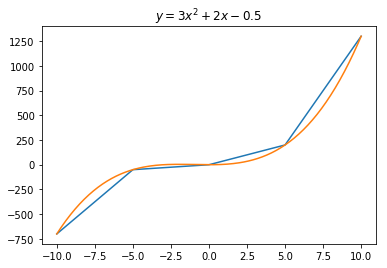

In [7]:
# Create the functions
x1 = np.arange(-10,10.01,5)
y1 = x1**3 + 3*x1**2 - 0.5
x2 = np.arange(-10,10.1,0.1)
y2 = x2**3 + 3*x2**2 - 0.5

plt.plot(x1,y1)
plt.plot(x2,y2)
plt.title(r'$y=3x^2+2x-0.5$')
plt.show()

# Pandas

Pandas is a greate tool for working with data in the exploratroy phase of an AI/ML project. It wraps up some commonly used python packages working upon as an excel dokument. 

The following is a basic example that contains some lines that describes the basics and gets you started with pands

In [19]:
# Initialize a pandas dataframe
df = pd.DataFrame({'serie':['a','a','b','b'],
                   'val1': np.array([1.1,1.3,1.35,1.1]), 
                   'val2': np.array([1.1,1.3,3.35,4.1])},
                   columns=['serie','val1', 'val2'])

# Append data to the dataframe
df = df.append(pd.DataFrame({'serie':['c','c','c'],'val1':np.array([1.05,1.1,1.3]),'val2':np.array([7.1,7.9,9.9])}),ignore_index=True)

# Insert a column to the dataframe and set default value to nan
df.insert(df.columns.size,'Test',np.nan)
print(df)

  serie  val1  val2  Test
0     a  1.10  1.10   NaN
1     a  1.30  1.30   NaN
2     b  1.35  3.35   NaN
3     b  1.10  4.10   NaN
4     c  1.05  7.10   NaN
5     c  1.10  7.90   NaN
6     c  1.30  9.90   NaN


In [9]:
# Set the values of Test columnt to 0
df.Test=0
df.loc[df.serie=='c','Test']=8*df.loc[df.serie=='c','val1']-df.loc[df.serie=='c','val2']
df

,serie,val1,val2,Test
0,a,1.10,1.10,0.0
1,a,1.30,1.30,0.0
2,b,1.35,3.35,0.0
3,b,1.10,4.10,0.0
4,c,1.05,7.10,1.3
5,c,1.10,7.90,0.9
6,c,1.30,9.90,0.5


In [10]:
# This cell shows the problem with a new variable being the memory pointer and not a new copy

df_temp=df
df_temp
df_temp.serie=1
df

,serie,val1,val2,Test
0,1,1.10,1.10,0.0
1,1,1.30,1.30,0.0
2,1,1.35,3.35,0.0
3,1,1.10,4.10,0.0
4,1,1.05,7.10,1.3
5,1,1.10,7.90,0.9
6,1,1.30,9.90,0.5


In [11]:
# Instead we must do a copy

df_temp=df.copy()
df_temp
df_temp.val1=1
print(df)
print(df_temp)

   serie  val1  val2  Test
0      1  1.10  1.10   0.0
1      1  1.30  1.30   0.0
2      1  1.35  3.35   0.0
3      1  1.10  4.10   0.0
4      1  1.05  7.10   1.3
5      1  1.10  7.90   0.9
6      1  1.30  9.90   0.5
   serie  val1  val2  Test
0      1     1  1.10   0.0
1      1     1  1.30   0.0
2      1     1  3.35   0.0
3      1     1  4.10   0.0
4      1     1  7.10   1.3
5      1     1  7.90   0.9
6      1     1  9.90   0.5


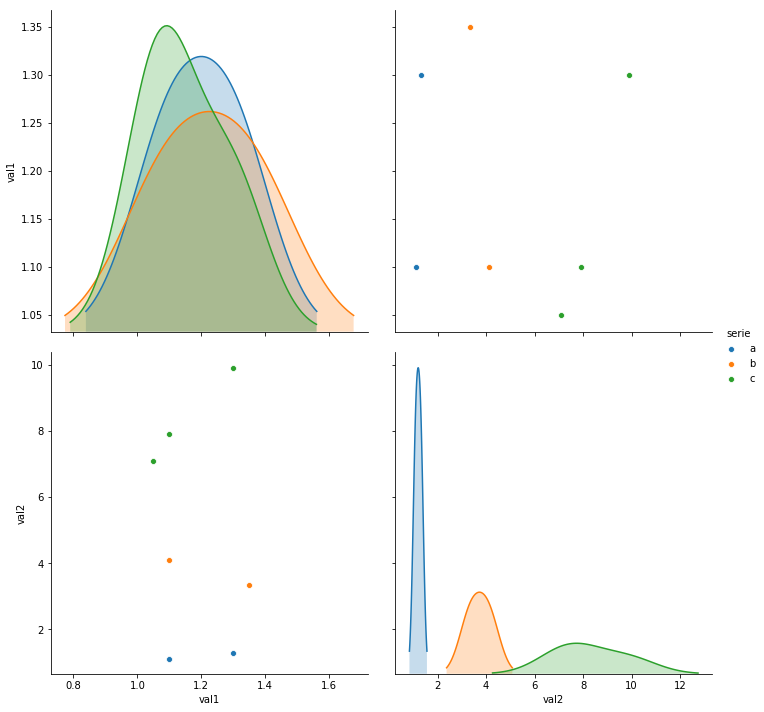

In [20]:
# Visualizing the data with seabourne
import seaborn as sns
sns.pairplot(vars=["val1","val2"], data=df, hue='serie', size=5)

